In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
url = 'https://raw.githubusercontent.com/selva86/datasets/master/a10.csv'
df = pd.read_csv(url, parse_dates=['date'], index_col='date')

# Inspecting the first few rows
df.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


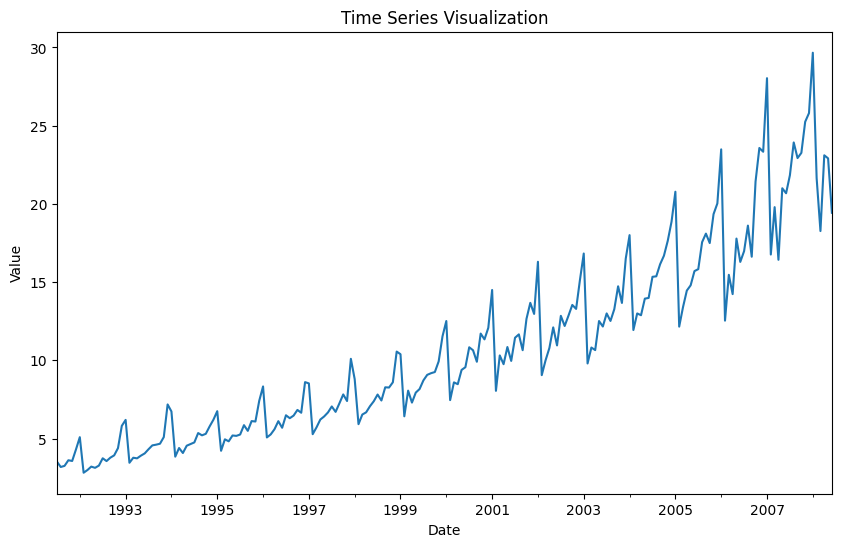

In [2]:
# Plotting the time series
plt.figure(figsize=(10,6))
df['value'].plot()
plt.title("Time Series Visualization")
plt.xlabel("Date")
plt.ylabel("Value")
plt.show()


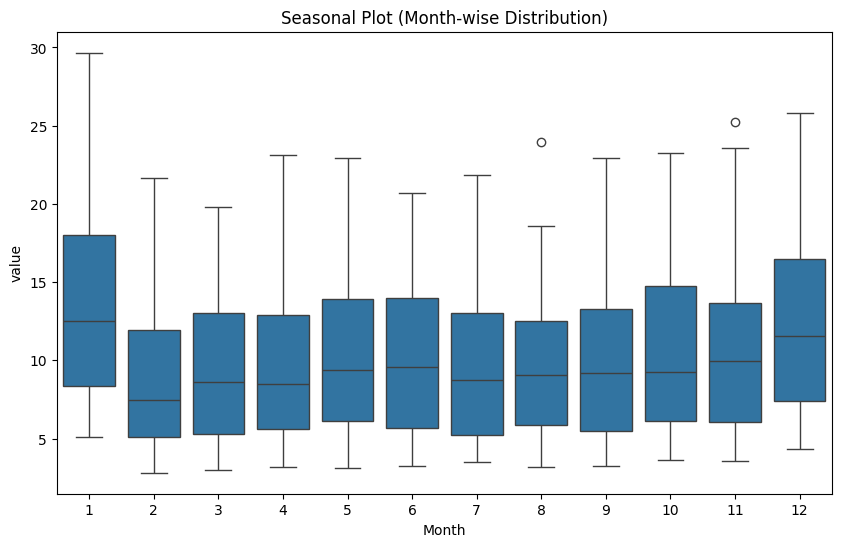

In [3]:
import seaborn as sns

# Extracting the month from the 'date' column
df['Month'] = df.index.month

# Creating the seasonal boxplot
plt.figure(figsize=(10,6))
sns.boxplot(x='Month', y='value', data=df)
plt.title("Seasonal Plot (Month-wise Distribution)")
plt.show()


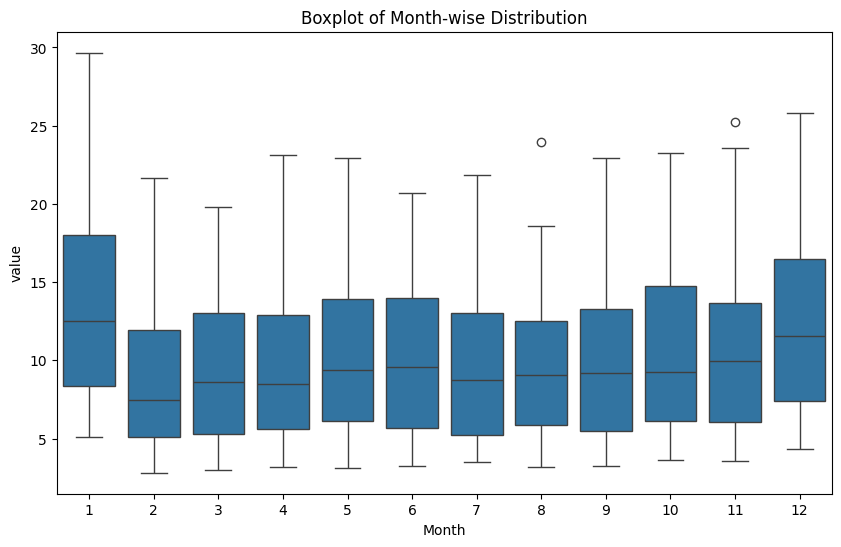

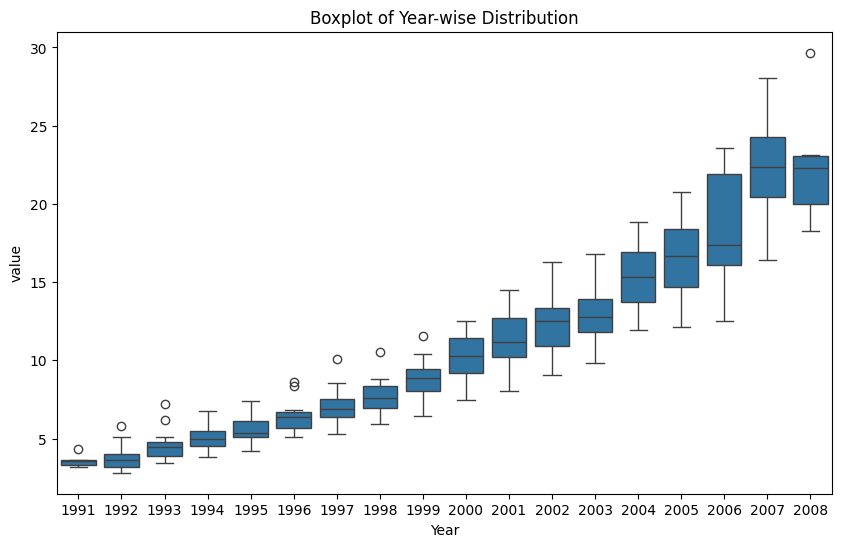

In [ ]:
# Extracting year from the 'date' column
df['Year'] = df.index.year

# Boxplot for Month-wise distribution
plt.figure(figsize=(10,6))
sns.boxplot(x='Month', y='value', data=df)
plt.title("Boxplot of Month-wise Distribution")
plt.show()

# Boxplot for Year-wise distribution
plt.figure(figsize=(10,6))
sns.boxplot(x='Year', y='value', data=df)
plt.title("Boxplot of Year-wise Distribution")
plt.show()


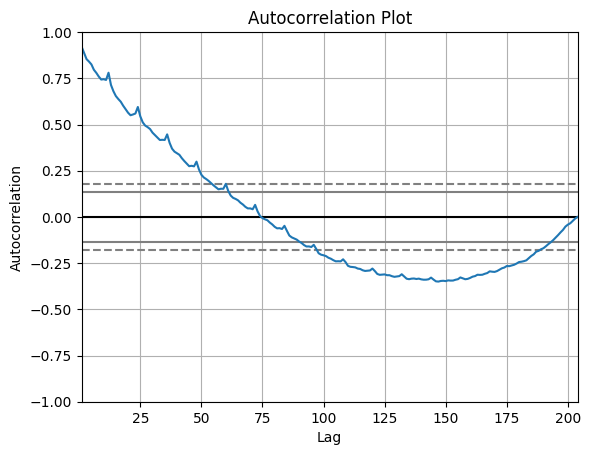

In [4]:
from pandas.plotting import autocorrelation_plot

# Autocorrelation plot
autocorrelation_plot(df['value'])
plt.title("Autocorrelation Plot")
plt.show()


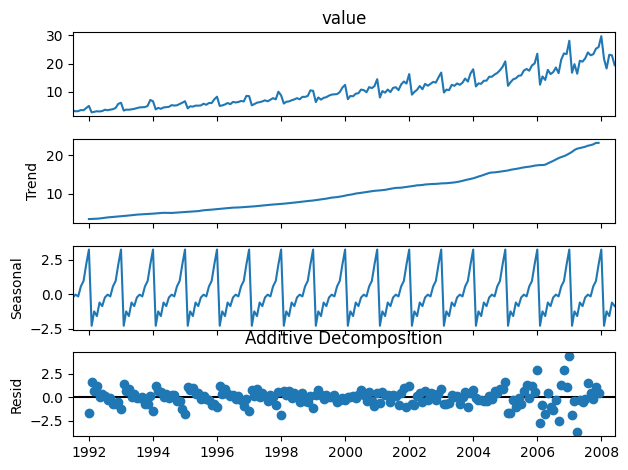

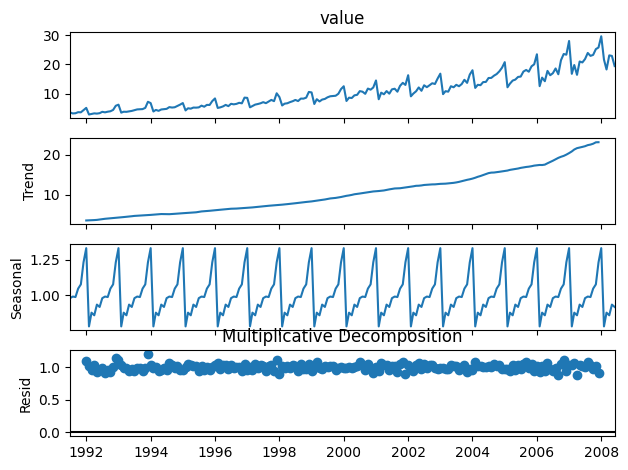

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Additive Decomposition
result_additive = seasonal_decompose(df['value'], model='additive', period=12)
result_additive.plot()
plt.title("Additive Decomposition")
plt.show()

# Multiplicative Decomposition
result_multiplicative = seasonal_decompose(df['value'], model='multiplicative', period=12)
result_multiplicative.plot()
plt.title("Multiplicative Decomposition")
plt.show()


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Load the dataset
url = 'https://raw.githubusercontent.com/selva86/datasets/master/a10.csv'
df = pd.read_csv(url, parse_dates=['date'], index_col='date')

# Perform ADF test
adf_result = adfuller(df['value']) # Changed column name to 'value'
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
if adf_result[1] <= 0.05:
    print("The series is stationary.\n")
else:
    print("The series is non-stationary.\n")

ADF Statistic: 3.14518568930675
p-value: 1.0
The series is non-stationary.



ADF Statistic (Differenced): -2.5426618388692184
p-value (Differenced): 0.10543619184937175


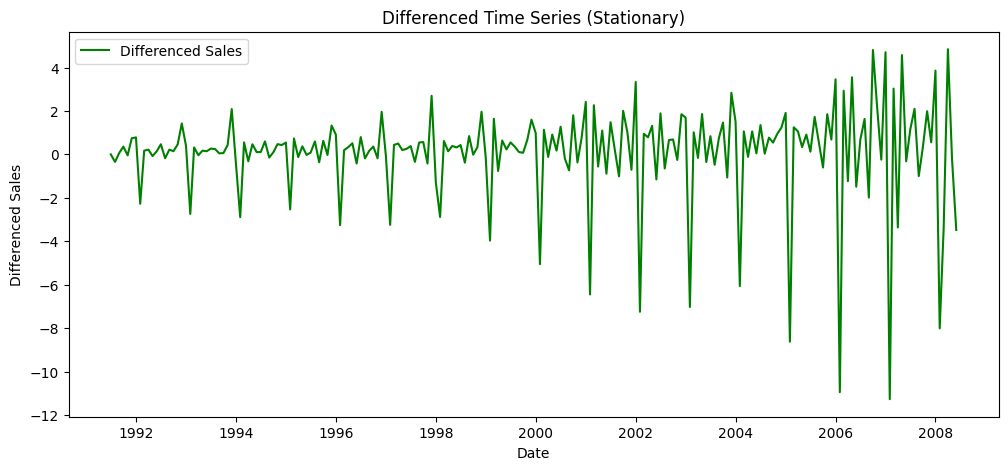

In [7]:
df['Differenced'] = df['value'].diff().fillna(0)

# Perform ADF test on the differenced series
adf_result_diff = adfuller(df['Differenced'].dropna()) # Drop NaN values before ADF test

print("ADF Statistic (Differenced):", adf_result_diff[0])
print("p-value (Differenced):", adf_result_diff[1])

plt.figure(figsize=(12, 5))
plt.plot(df['Differenced'], label='Differenced Sales', color='green')
plt.title('Differenced Time Series (Stationary)')
plt.xlabel('Date')
plt.ylabel('Differenced Sales')
plt.legend()
plt.show()

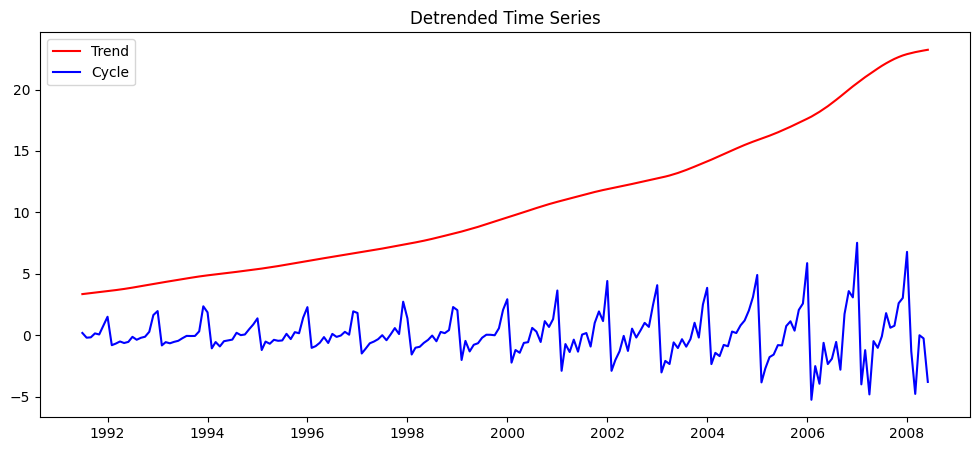

In [ ]:
!pip install statsmodels
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.filters.hp_filter import hpfilter # Import hpfilter

# ... (rest of your code) ...

cycle, trend = hpfilter(df['value'], lamb=1600) # Assuming 'value' is the correct column

plt.figure(figsize=(12, 5))
plt.plot(trend, label='Trend', color='red')
plt.plot(cycle, label='Cycle', color='blue')
plt.title('Detrended Time Series')
plt.legend()
plt.show()

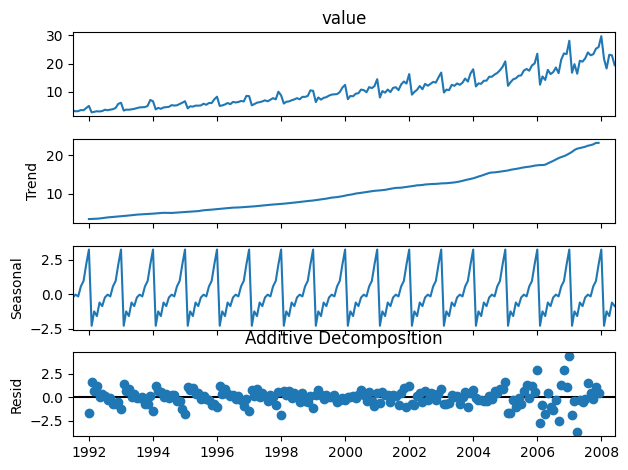

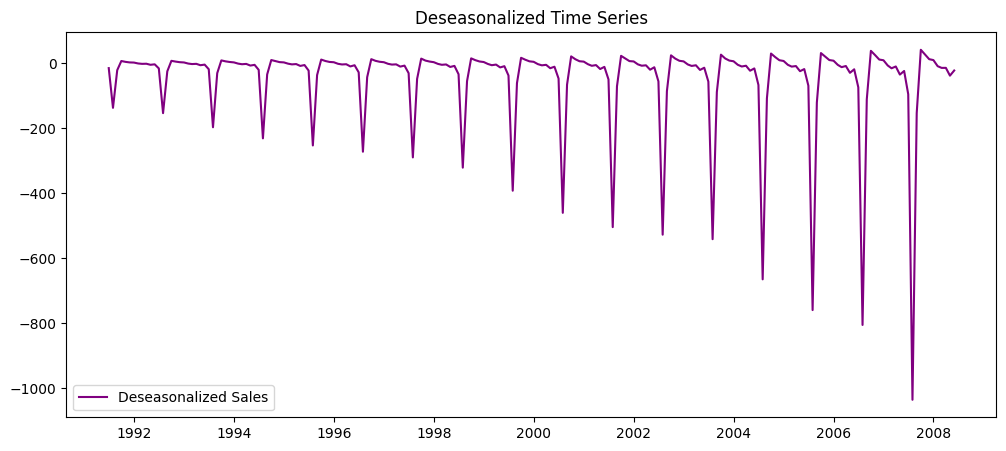

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose # Make sure to import

# ... (Your previous code for loading and preprocessing data) ...

# Additive Decomposition - Re-run this cell before the deseasonalizing step
result_additive = seasonal_decompose(df['value'], model='additive', period=12)
result_additive.plot()
plt.title("Additive Decomposition")
plt.show()

# ... (Your code for deseasonalizing) ...
deseasonalized = df['value'] / result_additive.seasonal # Use 'value' column and result_additive

plt.figure(figsize=(12, 5))
plt.plot(deseasonalized, label='Deseasonalized Sales', color='purple')
plt.title('Deseasonalized Time Series')
plt.legend()
plt.show()

In [ ]:
import numpy as np
seasonal_var = np.var(result_additive.seasonal.dropna())
total_var = np.var(df['value'])
seasonality_strength = seasonal_var / total_var

print(f"Strength of seasonality: {seasonality_strength:.2f}")

Strength of seasonality: 0.06
